## 딥러닝 한번에 끝내기
### 4. 딥러닝 모델 학습

### 4-1 들어가며

![](./img04/01.png)

![](./img04/02.png)

#### 과정개요

손실 함수(Loss Function)
딥러닝 학습에서 손실 함수의 역할은 무엇인지 파악하고 각각의 손실 함수의 동작과 특징을 살펴봅니다.

옵티마이저(Optimizer)와 지표
딥러닝 학습에서 옵티마이저의 역할은 무엇이고 딥러닝 학습의 핵심으로 볼 수 있는 경사하강법에 대해서 배웁니다.

딥러닝 모델 학습
실습을 통해 딥러닝이 학습되는 과정을 이해하고 경험해봅니다.

#### 학습 목표

딥러닝 모델을 학습하기 위한 개념을 설명할 수 있습니다.

손실 함수, 옵티마이저, 지표에 대해서 설명할 수 있습니다.

### 4-2 손실 함수(Loss Function)

![](./img04/03.png)

![](./img04/04.png)

실제값에서 모델이 예측한 값을 뺀 뒤 평균을 구함

![](./img04/05.png)

![](./img04/06.png)

MAE vs MSE
MAE는 로스가 일정하게 감소, MSE는 차이가 클때는 더 많은 가중치를 줌

Q.평균절대오차(Mean Absolute Error, MAE)는 평균제곱오차(Mean Squared Error, MSE)는 서로 어떤 공통점과 차이점이 있나요?

평균절대오차(Mean Absolute Error, MAE)와 평균제곱오차(Mean Squared Error, MSE)는 둘 다 회귀 모델의 성능을 측정하기 위한 지표로 사용됩니다.

둘 다 오차를 기준으로 총합을 해 평균을 구하며 각각의 오차를 절대 값으로 다룰지 혹은 제곱 값으로 처리하는지가 다릅니다.


공통점:
- 모두 회귀 모델의 성능을 측정하는 지표로 사용됨
- 모델의 예측 값과 실제 값 간의 차이를 측정하여 유사한 의미를 가짐
- 오차 값이 작을수록 모델이 더 정확하다고 평가됨

차이점:
- MSE는 오차 값을 제곱한 후 평균한 것이고, MAE는 오차 값을 절대 값으로 변환한 후 평균한 것입니다.
- MSE는 오차가 큰 값에 대해서 패널티를 더 부여하므로, 이상치(outliers)가 있는 데이터에 민감하게 반응할 수 있습니다. 반면에 MAE는 이상치에 덜 민감하게 반응합니다.
- 따라서, 이상치가 매우 영향력 있는 경우 MSE보다는 MAE를 사용하는 것이 바람직합니다.

Q. 평균절대오차(Mean Absolute Error, MAE)는 평균제곱오차(Mean Squared Error, MSE)와 비교했을 때 어떻게 이상치에 강건할 수 있나요?

오차가 매우 크더라도(outlier) 제곱항으로 영향을 미치는 것이 아니라 차이의 절대값만큼만 영향을 미치기 때문에 MSE에 비해 상대적으로 이상치에 더 강건합니다.

평균절대오차(Mean Absolute Error, MAE)는 평균제곱오차(Mean Squared Error, MSE)와 비교하여 이상치(outlier)에 덜 민감한 지표입니다. MAE는 오차 값의 절대값을 사용하기 때문에, 이상치를 포함한 모든 오차가 평균적으로 같은 비중을 가지게 됩니다. 즉, 이상치가 있어도 이러한 오차의 영향이 상대적으로 크지 않으므로 모델의 성능을 신뢰성있게 평가할 수 있습니다. 반면에 MSE는 오차값을 제곱하기 때문에, 작은 값에는 더 작은 가중치가 부여되고 큰 값에는 더 큰 가중치가 부과되는 결과를 가져옵니다. 이러한 특성 때문에 이상치가 있는 경우 모델의 성능에 큰 영향을 미치게 됩니다. 따라서, 이상치가 포함된 데이터셋에서는 MAE를 사용하는 것이 모델의 성능을 더욱 강건하게 평가할 수 있는 방법입니다.

![](./img04/07.png)

![](./img04/08.png)

소프트맥스는 결과값으로 확률값을 가지게 되는데 원핫 인코딩 사이의 출력간 거리 비교함

Q. 다중 분류 신경망에서 소프트맥스를 통해 나온 각 클래스에 대한 출력값이 0.6(정답), 0.1(오답), 0.3(오답)일 때 교차 엔트로피 오차값은 얼마일까요? (단, 결과 값은 소수점 셋째 자리에서 반올림합니다.)

교차 엔트로피 오차(Cross-entropy error)는 다중 분류 신경망에서 주로 사용되는 손실 함수 중 하나입니다. 각 클래스에 대한 출력 값과 실제 클래스에 대한 값을 비교하여 loss를 계산합니다. 교차 엔트로피 오차의 수식은 다음과 같습니다.
$$
E = -\sum_{k} t_k \log y_k
$$
여기서, $t_k$는 실제 클래스에 대한 값이며, $y_k$는 예측된 클래스의 확률값입니다. 주어진 문제에서는 실제 클래스에 대한 값이 1이고, 나머지 클래스에 대한 값이 0이므로, 수식을 간단하게 계산할 수 있습니다. 따라서, 교차 엔트로피 오차값은 다음과 같습니다.
$$
E = -\sum_k t_k \log y_k = -\log 0.6 \approx \boxed{0.51}
$$ 소수점 셋째 자리에서 반올림하여 0.51이 됩니다.

Q. 2개의 클래스를 분류하는 문제에서 1번이 정답일 확률이 0.8로 나왔을 때, 실제로 1번이 정답이었을 경우와 2번이 정답이었을 경우 교차 크로스 엔트로피 값은 각각 얼마일까요? (단, 결과 값은 소수점 셋째 자리에서 반올림합니다.)

2개의 클래스를 분류하는 문제에서 교차 크로스 엔트로피(Cross-Entropy)는 다음과 같은 수식으로 정의됩니다.

$$
E = -\sum_{i=1}^{n} (y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i}))
$$

여기서, $y_i$는 실제 클래스 값(0 또는 1)이고, $\hat{y}_i$는 예측 클래스의 확률값입니다. 이 문제에서는 2개의 클래스를 분류하는 문제이므로, $n=2$입니다.

먼저, 실제로 1번이 정답이었을 경우를 생각해보겠습니다. 이 경우, 첫 번째 클래스가 정답(즉, $y_1 = 1$)이므로, 교차 엔트로피는 다음과 같이 계산됩니다.

$$
E_1 = -\sum_{i=1}^{2} (y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})) \\
= -(1 \log(0.8) + (1-1) \log(1 - 0.8)) \\
= -1 \log(0.8) \\
\approx 0.223
$$

다음으로, 실제로 2번이 정답이었을 경우를 생각해보겠습니다. 이 경우, 두 번째 클래스가 정답(즉, $y_2 = 1$)이므로, 교차 엔트로피는 다음과 같이 계산됩니다.

$$
E_2 = -\sum_{i=1}^{2} (y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})) \\
= -(0 \log(0.8) + (1-0) \log(1 - 0.8)) \\
= -1 \log(0.2) \\
\approx 1.61
$$

따라서, 실제로 1번이 정답인 경우의 교차 크로스 엔트로피 값은 0.223(소수점 셋째 자리에서 반올림), 실제로 2번이 정답인 경우의 교차 크로스 엔트로피 값은 0입니다.

### 4-3 옵티마이저(Optimizer)와 지표

![](./img04/09.png)

![](./img04/10.png)

Q. 경사하강법은 무슨 일을 하나요?

옵티마이저는 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정합니다. Keras에서 여러 옵티마이저를 제공하고, 사용자는 특정 종류의 확률적 경사 하강법을 지정할 수 있습니다.

경사하강법(Gradient Descent)은 함수를 최적화하기 위한 기법 중 하나입니다. 함수의 기울기(Gradient)를 이용해 함수의 최솟값을 찾아가는 방법입니다.

경사하강법은 다음과 같은 과정으로 함수의 최적값을 탐색합니다.

1. 임의의 시작점을 선택합니다.
2. 함수의 기울기(Gradient)를 구합니다.
3. 기울기가 가리키는 방향으로 일정 거리만큼 이동합니다. (이동 거리는 학습률(learning rate)로 조절합니다)
4. 이동한 지점에서 다시 2, 3번을 반복합니다.
5. 반복을 통해 함수 값이 더 이상 개선되지 않을 때까지 계속합니다.

경사하강법은 비용 함수(cost function)나 손실 함수(loss function)와 같은 모델의 최소화를 위한 함수를 최적화하는 데 자주 사용됩니다. 따라서, 경사하강법은 기계 학습에서 모델을 학습하는 데에도 널리 사용되며, 딥러닝에서도 역전파 알고리즘을 구현하는 데 필수적인 최적화 알고리즘 중 하나입니다.

Q. 왜 경사하강법으로는 안장점(Saddle point)에서 벗어나지 못할까요?

기울기의 반대 방향으로 다음 위치를 이동해야하는데 기울기 값이 0이라 이동하지 못합니다.

경사하강법은 함수의 기울기(Gradient) 정보를 이용하여 최적값을 찾는 기법입니다. 안장점(Saddle Point)은 기울기가 0이지만 극값이 아닌 지점으로, 기울기 정보만으로는 최적값과 구분할 수 없는 경우가 있어 경사하강법이 안장점에서 벗어나지 못하는 문제가 있습니다.

안장점에서 벗어나기 위해서는 경사하강법보다 더 복잡한 최적화 알고리즘이 필요합니다. 이를 위해 고안된 알고리즘 중 하나는 모멘텀(Momentum)입니다. 모멘텀은 경사하강법에서 기울기가 작을 때 빠르게 움직이도록 하여 안장점에서 벗어나도록 돕습니다.

또 다른 알고리즘으로는 자연 상수(e)의 지수 함수인 지수 이동 평균(Exponential Moving Average, EMA)을 이용하는 방법이 있습니다. EMA는 기울기가 너무 작거나 방향이 일정해질 때 지수 함수를 적용하여 기울기의 변화를 고려하며 움직입니다.

또한 안정적인 학습을 위해 학습률(learning rate)을 자동으로 조절해주는 방법도 있습니다. 예를 들어, AdaGrad와 Adam 등이 이에 해당합니다. 이러한 기법들을 사용하여 안장점에서 안정적인 학습을 수행할 수 있습니다.

![](./img04/11.png)

보통은 non convex function 이 많다.

![](./img04/12.png)

말의 안장을 떠올리면 된다. 0,0,0이 최저점인줄 알고 있지만 실제로는 0,0,0이 아닌 다른곳이 최저점이다.

경사하강법은 안장점을 벗어나지 못한다


![](./img04/13.png)

Q. 학습률은 어디에 사용되고 잘못 설정한 경우 어떤 문제가 발생할 수 있나요?

경사하강법을 통해 손실함수의 반대 기울기 방향으로 업데이트 할 때 업데이트 되는 크기에 관여하며 잘못 설정한 경우 손실함수의 최저점에 도달하지 못할 수 있습니다.

학습률(learning rate)은 경사 하강법(Gradient Descent) 및 그 변형 알고리즘에서 사용되는 하이퍼파라미터 중 하나입니다. 학습률은 말 그대로 학습하는 속도를 결정하는 파라미터로, 한 번의 학습 단계(Iteration)에서 다음 단계로 넘어갈 때 얼마나 크게(혹은 작게) 이동할지를 결정합니다.

학습률을 잘못 설정한 경우에는 몇 가지 문제가 발생할 수 있습니다.

1. 학습 속도 문제: 학습률이 너무 낮으면 학습 속도가 느려져 수렴하는데 오랜 시간이 걸릴 수 있습니다. 그리고 학습률이 너무 높으면 자주 발생하는 업데이트(이동)로 인해 모델이 수렴하기 전에 더 이상 최적화가 이루어지지 않을 수 있습니다.

2. 발산 문제: 학습률이 너무 높으면 발산(divergence) 문제가 발생할 수 있습니다. 즉, 모델이 수렴하지 않고 반복하는 동안 loss가 점점 더 커지는 상황이 발생할 수 있습니다.

3. 수렴 중 단계 건너뛰기 문제: 학습률이 너무 높으면 모델이 특정 지점을 지나칠 수 있습니다. 이러한 문제는 고차원 모델에서 다루기 어려우며, 이에 대한 대처책은 추가적인 기법이 필요합니다.

따라서, 적절한 학습률을 설정해야 합니다. 이를 위해 일반적으로 학습률 값은 0.1, 0.01, 0.001 등으로 설정하며, 하이퍼파라미터 튜닝을 통해 적절한 학습률 값을 찾는 것이 좋습니다. 또한, 학습률을 점진적으로 줄여 나가는 기법인 `Learning rate decay`를 사용하여 학습률이 너무 높거나 낮아지는 문제를 완화할 수 있습니다.

![](./img04/14.png)

### 4-4 딥러닝 모델 학습

![](./img04/15.png)


Q. 지금까지 배운 개념들을 종합해 딥러닝의 학습은 어떤 식으로 이뤄지는지 적어주세요.

먼저 데이터셋을 입력 X 와 실제 정답레이블인 Y로 구분합니다.

입력데이터는 연속된 레이어로 구성된 네트워크(모델)를 통해 결과로 예측 Y'을 출력합니다.

손실함수는 모델이 예측한 Y'과 실제 정답 Y의 차이를 비교하여 얼마나 차이가 나는지 측정하는 손실값을 계산합니다.

옵티마이저는 손실값을 사용하여 모델의 가중치를 업데이트하는 과정을 수행합니다.

모델이 새롭게 예측한 Y'과 실제 정답 Y의 차이를 측정하는 손실값을 계산하는 과정을 반복합니다.

계산한 소실값을 최소화하도록 옵티마이저가 동작하는 것이 딥러닝 모델 학습입니다.

GPT 답변

딥러닝의 학습은 크게 다음 세 단계로 이뤄집니다.

1. 순전파 (Forward propagation)

순전파는 입력층에서 시작하여 출력층까지 데이터가 흐르는 과정입니다. 입력 데이터가 모든 층을 거쳐 출력층에 도달하면 모델의 예측값이 계산됩니다. 이 과정에서 가중치와 편향을 갖는 모든 뉴런에서 입력값을 가중치와 함께 곱하고 편향을 더해 활성화 함수를 적용합니다. 이 과정에서 신경망의 파라미터인 가중치와 편향이 사용됩니다.

2. 오차 계산 (Cost/loss calculation)

출력값과 정답 사이의 차이, 즉 오차를 계산합니다. 이를 위해 오차 함수(loss function)라는 함수를 정의합니다. 대표적인 오차 함수는 평균 제곱 오차 (Mean Squared Error, MSE)와 교차 엔트로피(Cross Entropy) 함수가 있습니다. 오차를 계산하여 모델이 예측한 값이 실제 값과 얼마나 차이가 있는지를 파악할 수 있습니다.

3. 역전파 (Backward propagation)

역전파는 순전파와 반대로 출력값과 정답값 사이의 오차를 이용하여 각 파라미터의 손실 함수에 대한 기울기(gradient)를 계산합니다. 이를 이용하여 순전파에서 사용했던 가중치와 편향을 갱신합니다. 이 과정에서 경사 하강법(Gradient descent) 등의 최적화 알고리즘이 사용됩니다.

반복적으로 순전파, 오차 계산, 역전파를 반복하면서 가중치와 편향이 최적화됩니다. 딥러닝에서는 이러한 과정을 epochs(에포크)라는 단위로 수천, 수십만 번 반복합니다. 이를 통해 모델이 예측을 더 정확하게 수행할 수 있도록 하고, 학습 데이터에 오버피팅(Overfitting)되지 않도록 합니다.

#### 데이터 생성
선형회귀(Linear Regression)를 위한 딥러닝 모델 을 만들어보도록 하겠습니다. 먼저 데이터셋을 make_regression 함수를 이용하여 입력 X와 정답 y로 샘플 갯수(n_samples) 200개, 특징 갯수(n_featrues) 1개에 바이어스(bias)는 5.0, 노이즈(noise)는 5.0으로 지정하고, random_state는 123으로 하여 랜덤 시드를 지정해줍니다.

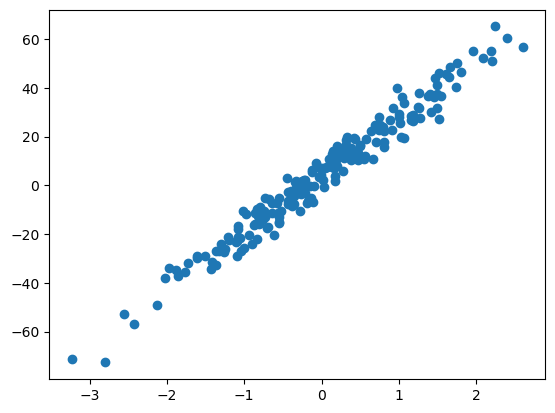

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1,
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

plt.scatter(X, y)
plt.show()

데이터는 학습용 데이터셋(x_train, y_train), 테스트용 데이터셋(x_test, y_test)으로 구분합니다.

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


#### 모델 생성
먼저 딥러닝을 사용하는데 필요한 라이브러리인 Tensorflow와 keras를 임포트합니다. 케라스(Keras)의 모델, 레이어, 옵티마이저, 유틸을 사용할 수 있도록 models, layers, optimizer, utils도 임포트합니다.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

2023-08-08 01:31:01.409040: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


모델은 간단하게 Sequential()을 이용해 선언하고, Dense 레이어 하나를 추가해줍니다. 레이어의 유닛수는 1개이고, activation은 선형 회귀이니 'linear'로 지정하며, input_shape은 (1,) 으로 1차원 모양으로 입력 모양을 가집니다. 최종 모델의 구조를 summary() 함수를 통해 확인해봅니다.

In [4]:
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


어떤 모델이 생성되었는지 그림으로 확인해 볼까요?

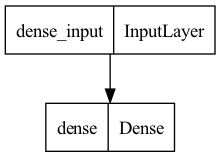

In [5]:
utils.plot_model(model)